In [1]:
from API import TradingAPI
import json
import matplotlib.pyplot as plt

In [4]:
api = TradingAPI.TradingAPI()

times, open_prices, high_prices, low_prices, close_prices, volumes = api.getTimeSeriesIntraday(symbol='AAPL', interval=5)

Request: https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&apikey=ZY4Y0XKCPYTO1EQG


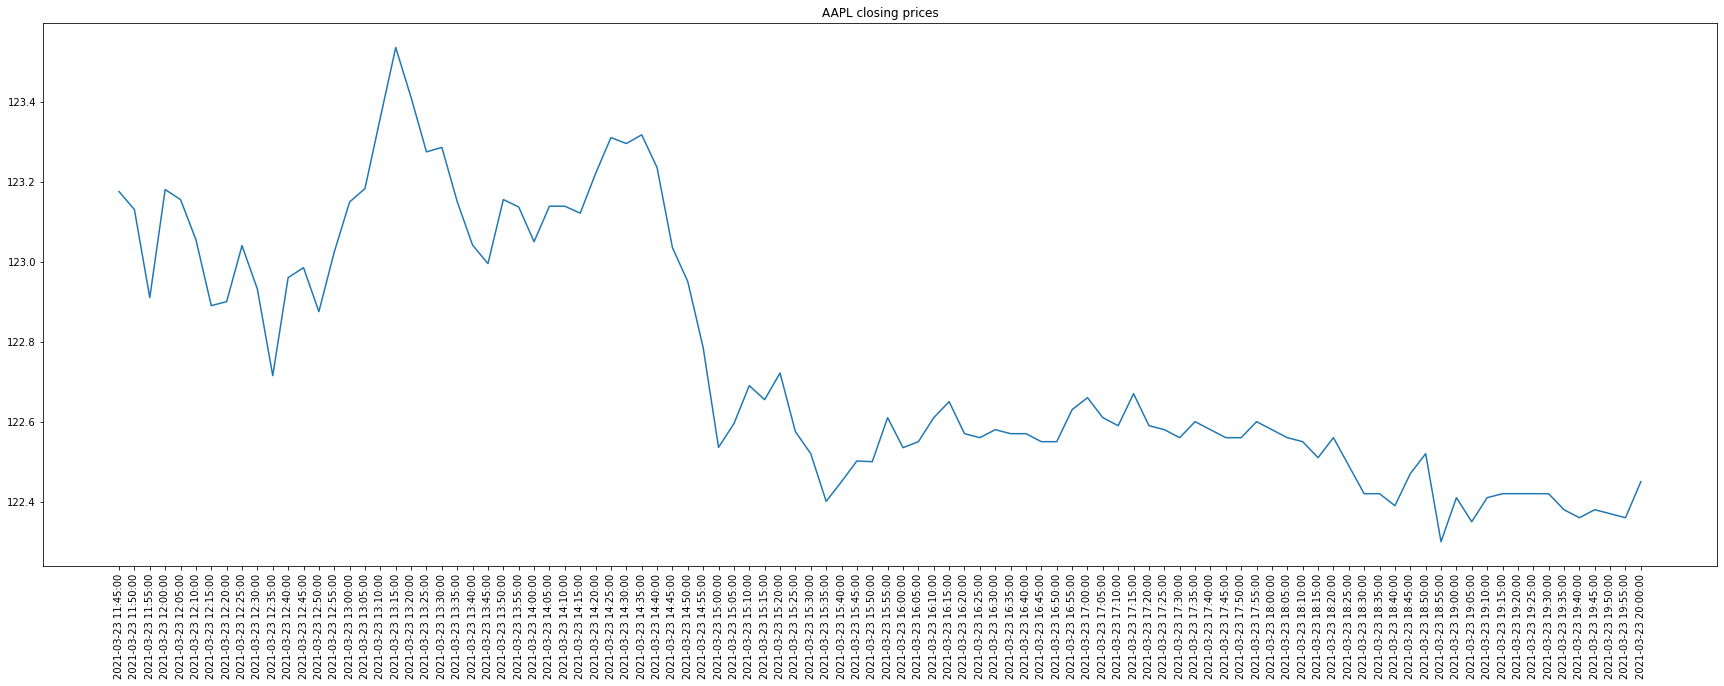

In [5]:
plt.figure(figsize=(30, 10))
plt.title('AAPL closing prices')
plt.plot(times, close_prices)
plt.xticks(rotation=90)
plt.show()